<a href="https://colab.research.google.com/github/gurusurya946/FML/blob/main/Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
     

In [33]:
data=pd.read_csv('/content/Dataset_master.xlsx - Instagram Ads Logistic Regressi.csv')

In [34]:
data.head()

,Age,Mobile Phone,Purchased
0,15,6334,0
1,28,6667,0
2,20,14334,0
3,21,19000,0
4,15,25334,0


In [35]:
data.isnull().sum()

Age             0
Mobile Phone    0
Purchased       0
dtype: int64

In [36]:
data.describe()

,Age,Mobile Phone,Purchased
count,199.000000,199.000000,199.000000
mean,29.829146,25568.145729,0.371859
std,8.481171,11958.465019,0.484520
min,14.000000,5000.000000,0.000000
25%,23.000000,16833.500000,0.000000
50%,29.000000,24667.000000,0.000000
75%,36.000000,32167.000000,1.000000
max,48.000000,50000.000000,1.000000


In [37]:
X=data.drop('Purchased',axis=1).values
y=data['Purchased'].values
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1
 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 0 1 0 0 1 1 1 0]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
     

In [39]:
X_train.reshape(-1,1)
y_train.reshape(-1,1)
reg=LogisticRegression(C=0.5)
reg.fit(X_train,y_train)

LogisticRegression(C=0.5)

In [40]:
reg.coef_

array([[3.03171874e-01, 1.37996088e-04]])

In [41]:
reg.intercept_scaling

1

In [42]:
reg.predict_proba(X_train)

array([[5.56864006e-01, 4.43135994e-01],
       [8.34914957e-01, 1.65085043e-01],
       [2.49876503e-01, 7.50123497e-01],
       [6.29223513e-02, 9.37077649e-01],
       [9.98693234e-01, 1.30676574e-03],
       [3.62627116e-02, 9.63737288e-01],
       [3.44798941e-02, 9.65520106e-01],
       [9.03402870e-01, 9.65971305e-02],
       [9.98471782e-01, 1.52821823e-03],
       [1.85236579e-02, 9.81476342e-01],
       [6.72554208e-01, 3.27445792e-01],
       [9.99725653e-01, 2.74346974e-04],
       [6.36695036e-02, 9.36330496e-01],
       [1.94799840e-01, 8.05200160e-01],
       [7.38774261e-01, 2.61225739e-01],
       [9.81033494e-01, 1.89665062e-02],
       [7.87417514e-01, 2.12582486e-01],
       [3.91028155e-03, 9.96089718e-01],
       [9.50295717e-01, 4.97042832e-02],
       [9.99259682e-01, 7.40317938e-04],
       [8.34914957e-01, 1.65085043e-01],
       [9.95068262e-01, 4.93173795e-03],
       [9.97646187e-01, 2.35381299e-03],
       [6.23058215e-02, 9.37694178e-01],
       [7.697465

In [43]:
y_predict=reg.predict(X_test)
print(y_predict)

[1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1]


In [44]:
reg.score(X_test, y_test)

0.9

In [45]:
confusion_matrix(y_test,y_predict)

array([[13,  1],
       [ 1,  5]])

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.83      0.83      0.83         6

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20



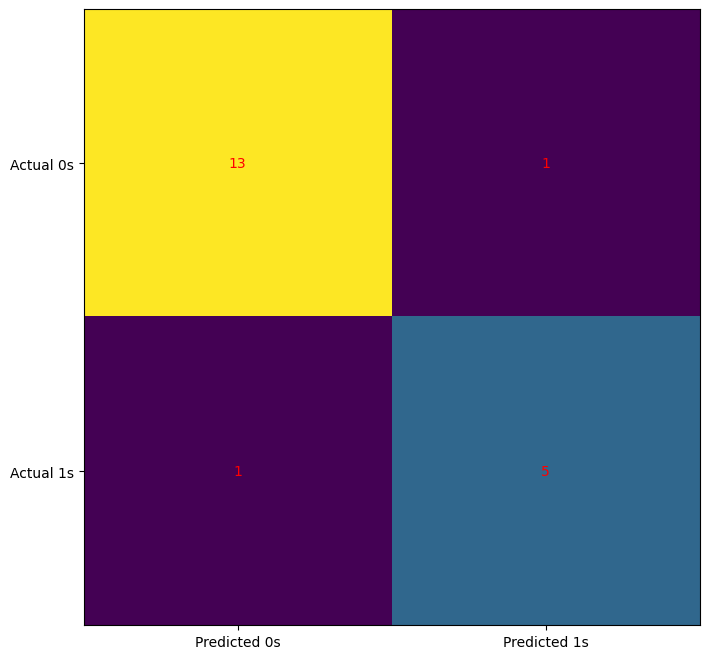

In [47]:
cm=confusion_matrix(y_test,y_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()